1. Faisons le web scrapping du site et stockons les informations sur le classement FIFA de l'équipe du Cameroun

In [1]:
import urllib
import bs4
import pandas as pd
import numpy as np
from urllib import request
import os
import requests

In [2]:
url = "https://fr.wikipedia.org/wiki/%C3%89quipe_du_Cameroun_de_football"

request_text = request.urlopen(url).read()

page = bs4.BeautifulSoup(request_text,'html.parser')

In [3]:
# Enregistrement de la table Classement FIFA dans la variable Table_Fifa
table_fifa = page.find("span", {"id" : "Classement_FIFA"}).parent.findNextSibling("table")

# Enregistrement des entêtes de la table résultante
heads = [table_fifa.findAll("tr")[i].find("th").text.strip() for i in [0, 1, 2]]

# Enregistrement de la table Classement FIFA dans un dataframe
dico = dict() # Dictionnaire

for i in [0, 1, 2]: # Enregistrement du contenu de chaque ligne dans le dictionnaire
    dico[i] = [table_fifa.findAll("tr")[i].findAll()[j].text.strip() 
               for j in np.arange(1, len(table_fifa.find("tr").findAll()))]
    
class_fifa = pd.DataFrame.from_dict(dico, orient= "columns") # Dataframe
class_fifa.columns = heads 

class_fifa.head() 

,Année,Classement mondial,Classement africain
0,1993,23,2
1,1994,31,7
2,1995,37,7
3,1996,56,10
4,1997,53,7


In [4]:
y = class_fifa["Année"]
X = class_fifa.drop("Année", axis = 1)

### __Prérequis__ 
Dans la suite du travail nous allons diviser notre base de données en deux :
* *La base de données d'apprentissage (70%)*
* *La base de données de test (30%)* 
 
Nous utilisons la fonction __train_test_split__ de la bibliothèque __SKLEARN__ pour diviser le jeu de données

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Construisons des modèles de classification:
1. __La méthode Bayésienne__</br>
Nous importons de la bibliothèque __SKLEARN__ la fonction __GaussianNB__ pour réaliser une classification basée sur la méthode Bayésienne

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [7]:
gnb.fit(X_train, y_train)

GaussianNB()

2. __La méthode KNN__ </br>
Nous utilisons la bibiothèque __SKLEARN__ avec deux(02)fonctions:
* __GridSearchCv__ Pour rechercher le meilleur nombre de voisin
* __KNeighborsClassifier__ : Pour éffectuer la classification basée sur les k_plus proche voisin 


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

classification = KNeighborsClassifier(n_neighbors = 4)

param = {
    "n_neighbors" : np.arange(1,3) 
}

In [9]:
classification.fit(X_train, y_train)
    

KNeighborsClassifier(n_neighbors=4)

__Commentaire__ Nous pouvons visualiser dès à présent le meilleur nombre de voisin idéale pour cette classification
et nous constatons que : </br> __k_ideale = 4__ 

Générons la matrice de confusion nous utilisons la fonction __confusion_matrix__ pour évaluer les modèles

In [10]:
from sklearn.metrics import confusion_matrix

* __Classification Bayésienne__

In [11]:
import seaborn as sns
import sklearn.metrics as skm
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix of a Naïve Bayes Model')

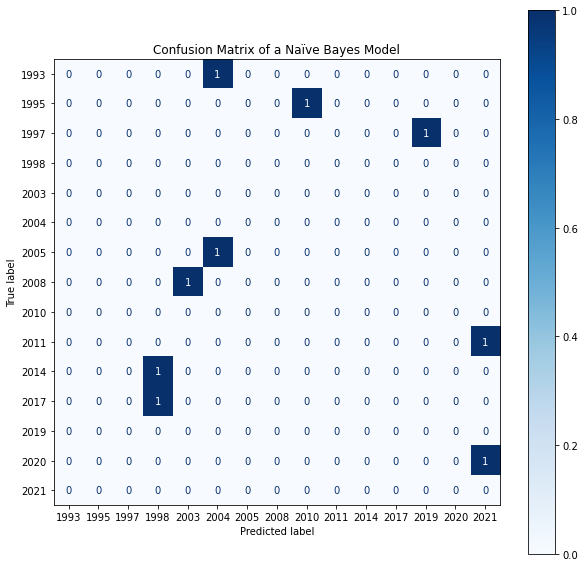

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))
skm.plot_confusion_matrix(gnb, X_test, y_test, values_format="d", cmap = "Blues", ax = ax)
plt.title("Confusion Matrix of a Naïve Bayes Model")


* __K-plus proche Voisin__

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix of a Naïve Bayes Model')

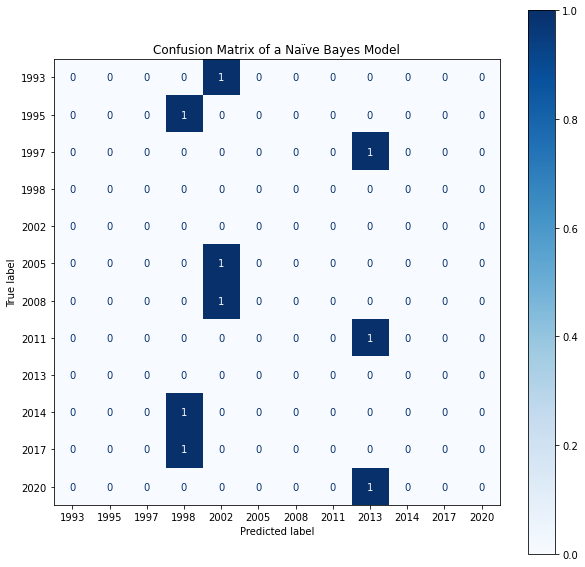

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
skm.plot_confusion_matrix(classification, X_test, y_test, values_format="d", cmap = "Blues", ax = ax)
plt.title("Confusion Matrix of a Naïve Bayes Model")

Imprimons les rapports des classifications puis évaluons les deux modèles

In [14]:
data = [[1, 1], [20, 1], [13, 2],[2,4]]
df = pd.DataFrame(data, columns=['Class Mon', 'Class Afr'])

In [15]:
gnb.predict(df)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Class Afr
- Class Mon
Feature names seen at fit time, yet now missing:
- Classement africain
- Classement mondial

  warnings.warn(message, FutureWarning)


array(['2009', '2004', '2003', '2006'], dtype='<U4')

In [16]:
classification.predict(df)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Class Afr
- Class Mon
Feature names seen at fit time, yet now missing:
- Classement africain
- Classement mondial

  warnings.warn(message, FutureWarning)


array(['2002', '2002', '2002', '2002'], dtype=object)

Interrogeons chacun de nos modèles pour prédire l'année ou le Cameroun occupera les classements ci-dessous :
1. __1ière place mondiale et Africaine__ :
* __KNN__ : 1994
* __NB__  : 2009
2. __20ième place mondiale et 1ière place Africaine__ :
* __KNN__ : 1994
* __NB__ :2002
3. __13ième place mondiale et 2ième place Africaine__ :
* __KNN__ : 1994
* __NB__ :2009
4. __2ième place mondiale et 4ième place Africaine__ :
* __KNN__ : 1994
* __NB__ : 2009

Selon nous, le modèle le mieux adapter pour ce classement est recommandé d'utiliser l'algorithme de classification Bayésienne car selon notre modèle, il fait le moins d'erreur 